In [1]:
from Basics import *
setplot(dark=True)

# Stellar-Halo Mass Relations

In [2]:
logmhalo = np.linspace(10, 15, 100)

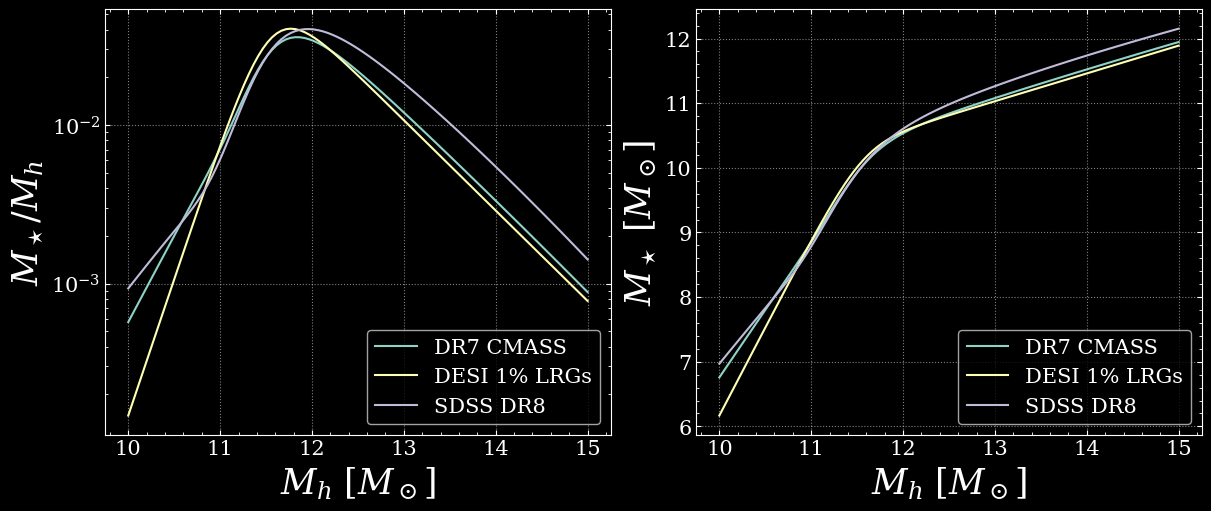

In [3]:
import Models.SHMRs as SHMRs
importlib.reload(SHMRs)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), layout='constrained')

DR7CMASS = SHMRs.Xu2023({'sample':'CMASS_BP13'}).HSMR(logmhalo)()
axs[0].plot(logmhalo, 10**DR7CMASS/10**logmhalo, label='DR7 CMASS')
axs[1].plot(logmhalo, DR7CMASS, label='DR7 CMASS')

DESI1P = SHMRs.Gao2023({'sample': 'ELG_Auto'}).HSMR(logmhalo)()
axs[0].plot(logmhalo, 10**DESI1P/10**logmhalo, label='DESI 1% LRGs')
axs[1].plot(logmhalo, DESI1P, label='DESI 1% LRGs')

SDSSDR8 = SHMRs.Kravstov2014({'sample':'Mvir_scatter'}).HSMR(logmhalo)()
axs[0].plot(logmhalo, 10**SDSSDR8/10**logmhalo, label='SDSS DR8')
axs[1].plot(logmhalo, SDSSDR8, label='SDSS DR8')

axs[0].set(xlabel=r'$M_h \ [M_\odot]$', ylabel=r'$M_\star / M_h$', yscale='log'); axs[0].legend()
axs[1].set(xlabel=r'$M_h \ [M_\odot]$', ylabel=r'$M_\star \ [M_\odot]$'); axs[1].legend()

plt.show()

# Halo Occupancy Distributions

In [4]:
logmhalo = np.linspace(10, 15, 100)

/global/u2/c/cpopik/Capybara/Models/HODs.py:31: RuntimeWarning: invalid value encountered in power
  return ((M-M_0)/M_1)**alpha


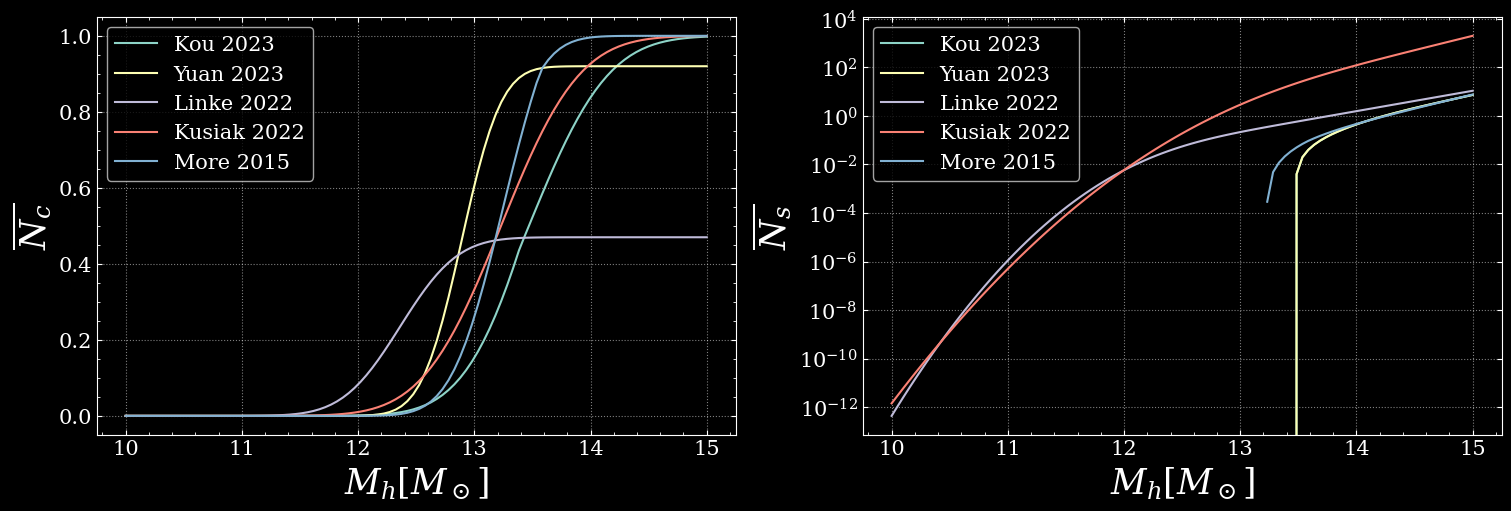

In [5]:
import Models.HODs as HODs
importlib.reload(HODs)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

Kou = HODs.Kou2023({'sample':'M*>10.8'})
KouNc, KouNs = Kou.Nc(logmhalo)(), Kou.Ns(logmhalo)()
axs[0].plot(logmhalo, KouNc, label='Kou 2023')
axs[1].plot(logmhalo, KouNs, label='Kou 2023')

Yuan = HODs.Yuan2023({'sample':"LRG 0.4<z<0.6"})
YuanNc, YuanNs = Yuan.Nc(logmhalo)(), Kou.Ns(logmhalo)()
axs[0].plot(logmhalo, YuanNc, label='Yuan 2023')
axs[1].plot(logmhalo, YuanNs, label='Yuan 2023')

Linke = HODs.Linke2022({'sample':'MS red'})
LinkeNc, LinkeNs = Linke.Nc(logmhalo)(), Linke.Ns(logmhalo)()
axs[0].plot(logmhalo, LinkeNc, label='Linke 2022')
axs[1].plot(logmhalo, LinkeNs, label='Linke 2022')

Kusiak = HODs.Kusiak2022({'sample':'Red'})
KusiakNc, KusiakNs = Kusiak.Nc(logmhalo)(), Kusiak.Ns(logmhalo)()

axs[0].plot(logmhalo, KusiakNc, label='Kusiak 2022')
axs[1].plot(logmhalo, KusiakNs, label='Kusiak 2022')

More = HODs.More2015({'sample':'[11.10, 12.00]'})
MoreNc, MoreNs = More.Nc(logmhalo)(), More.Ns(logmhalo)()
axs[0].plot(logmhalo, MoreNc, label='More 2015')
axs[1].plot(logmhalo, MoreNs, label='More 2015')

axs[0].set(ylabel=r'$\overline{N_c}$', xlabel=r'$M_h [M_\odot]$'); axs[0].legend()
axs[1].set(ylabel=r'$\overline{N_s}$', xlabel=r'$M_h [M_\odot]$', yscale='log'); axs[1].legend()
plt.show()

# Halo Model Functions

In [155]:
cpars = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76, "T_CMB":2.725}
logmhalo = np.linspace(10, 15, 50)
z = np.linspace(0.4, 1.1, 10)
k = np.logspace(-1, 1)

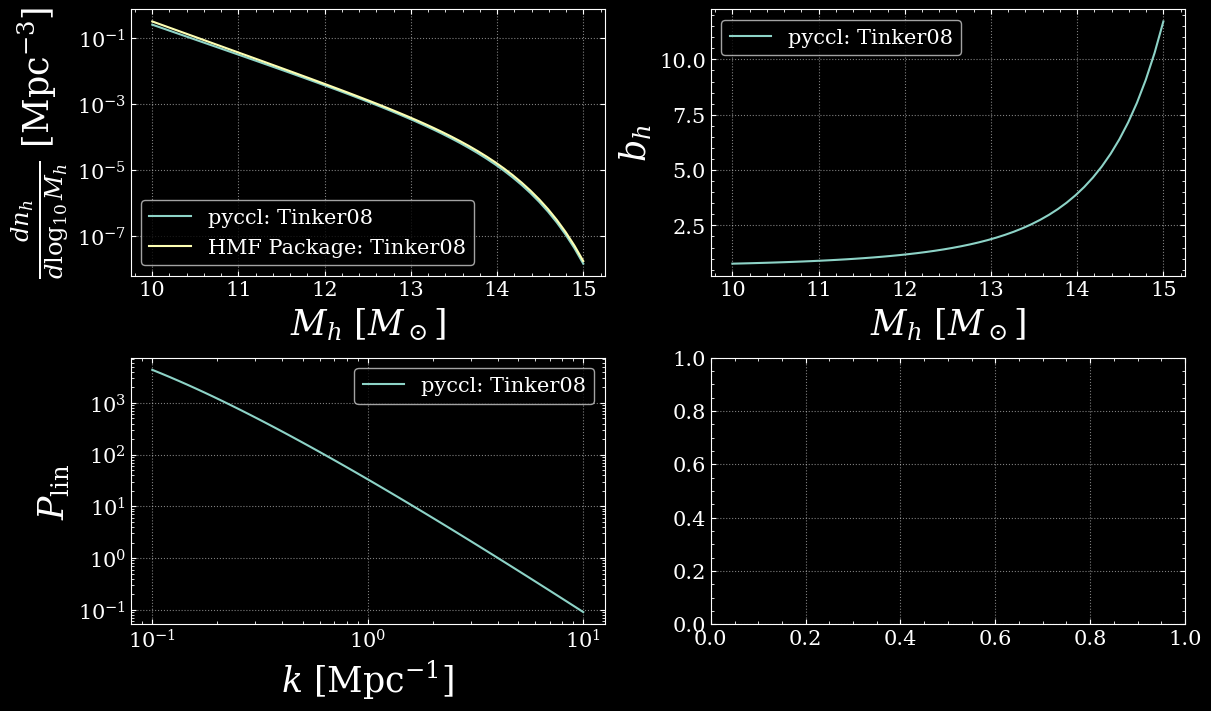

In [159]:
import Models.HaloModels as HaloModels
importlib.reload(HaloModels)

fig, axs = plt.subplots(2, 2, figsize=(12, 7), layout='constrained')
axs = axs.flatten()

ccl = HaloModels.pyccl({'mdef':'200c', 'mfunc':'Tinker08', 'hbias':'Tinker10'})
ccl_hmf, ccl_bh, ccl_Plin = ccl.HMF(z, logmhalo, **cpars), ccl.bh(z, logmhalo, **cpars), ccl.Plin(k, z, **cpars)
axs[0].plot(logmhalo, ccl_hmf[5], label='pyccl: Tinker08')
axs[1].plot(logmhalo, ccl_bh[5], label='pyccl: Tinker08')
axs[2].loglog(k, ccl_Plin[:, 5], label='pyccl: Tinker08')

hmfpack = HaloModels.hmf_package({'mfunc':'Tinker08', 'mdef':'SOCritical'}).HMF(z, logmhalo, **cpars)
axs[0].plot(logmhalo, hmfpack[5], label='HMF Package: Tinker08')

axs[0].set(ylabel=r'$\frac{dn_h}{d\log_{10} M_h}$ [Mpc$^{-3}$]', xlabel=r'$M_h \ [M_\odot]$', yscale='log'); axs[0].legend()
axs[1].set(ylabel=r'$b_h$', xlabel=r'$M_h \ [M_\odot]$'); axs[1].legend()
axs[2].set(ylabel=r'$P_\text{lin}$', xlabel=r'$k \ [\text{Mpc}^{-1}]$'); axs[2].legend()

plt.show()

# Halo Profiles

In [8]:
cpars = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76, "T_CMB":2.725}
logmshalo = np.linspace(10, 14, 50)
zs = np.linspace(0.4, 1.1, 10)
rs = np.logspace(-1.5, 1.5, 100)

cosmology = astropy.cosmology.LambdaCDM(H0=cpars["hh"]*100, Tcmb0=2.726, Om0=cpars["Omega_m"], Ode0=cpars["Omega_L"], Ob0=cpars["Omega_b"])
rhoc_func = lambda z: cosmology.critical_density(z).to(u.Msun/u.Mpc**3).value
r200c_func = lambda z, logm200c: (10**logm200c/(4/3*np.pi*200*rhoc_func(z[:, None])))**(1/3)
rhocs = rhoc_func(zs)
rs200c = r200c_func(zs, logmshalo)

import Models.FFTs as FFTs
ks, FFT_func = FFTs.mcfit_package(rs).FFT3D()
rs_rev, IFFT_func = FFTs.mcfit_package(rs).IFFT3D()

import Models.HaloModels as HaloModels
hmfccl = HaloModels.pyccl({'mdef':'200c', 'mfunc':'Tinker08', 'hbias':'Tinker10'})
Pklin = hmfccl.Plin(ks, zs, **cpars)
bias = hmfccl.bh(zs, logmshalo, **cpars)
hmf = hmfccl.HMF(zs, logmshalo, **cpars)


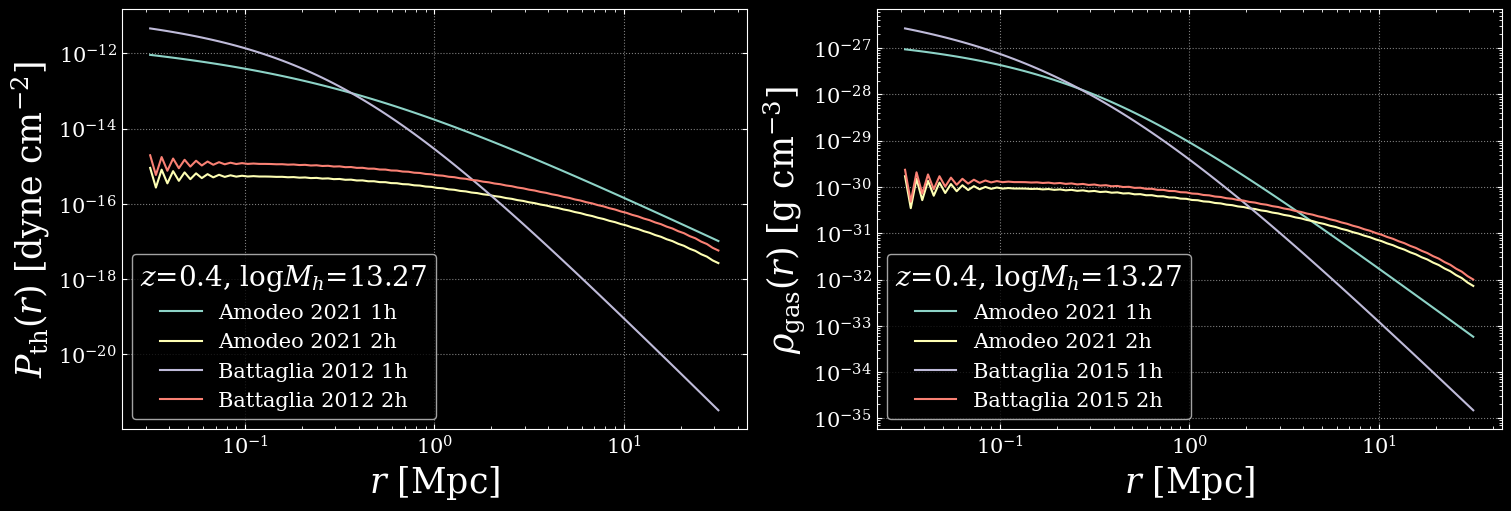

In [12]:
import Models.Profiles as Profiles
importlib.reload(Profiles)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

Amodeo = Profiles.Amodeo2021({'model':'GNFW'})

AmodeoPth_1h = Amodeo.Pth1h(rs, zs, logmshalo, rhocs, rs200c, **cpars)()
axs[0].loglog(rs, AmodeoPth_1h[:, 0, 40], label='Amodeo 2021 1h')
AmodeoPth_2h = Amodeo.Pth2h(rs, zs, logmshalo, rhocs, rs200c, Pklin, bias, hmf, FFT_func, IFFT_func, ks, **cpars)()
axs[0].loglog(rs, AmodeoPth_2h[:, 0], label='Amodeo 2021 2h')

Amodeorho_1h = Amodeo.rho1h(rs, zs, logmshalo, rhocs, rs200c, **cpars)()
axs[1].loglog(rs, Amodeorho_1h[:, 0, 40], label='Amodeo 2021 1h')
Amodeorho_2h = Amodeo.rho2h(rs, zs, logmshalo, rhocs, rs200c, Pklin, bias, hmf, FFT_func, IFFT_func, ks, **cpars)()
axs[1].loglog(rs, Amodeorho_2h[:, 0], label='Amodeo 2021 2h')


Battaglia12 = Profiles.Battaglia2012({'model':'B12'})
Battaglia12_1h = Battaglia12.Pth1h(rs, zs, logmshalo, rhocs, rs200c, **cpars)()
axs[0].loglog(rs, Battaglia12_1h[:, 0, 40], label='Battaglia 2012 1h')
Battaglia2012_2h = Battaglia12.Pth2h(rs, zs, logmshalo, rhocs, rs200c, Pklin, bias, hmf, FFT_func, IFFT_func, **cpars)()
axs[0].loglog(rs, Battaglia2012_2h[:, 0, 40], label='Battaglia 2012 2h')

Battaglia15 = Profiles.Battaglia2015({'model':'AGN'})
Battaglia15_1h = Battaglia15.rho1h(rs, zs, logmshalo, rhocs, rs200c, **cpars)()
axs[1].loglog(rs, Battaglia15_1h[:, 0, 40], label='Battaglia 2015 1h')
Battaglia15_2h = Battaglia15.rho2h(rs, zs, logmshalo, rhocs, rs200c, Pklin, bias, hmf, FFT_func, IFFT_func, **cpars)()
axs[1].loglog(rs, Battaglia15_2h[:, 0, 40], label='Battaglia 2015 2h')


axs[0].set(ylabel=r'$P_\text{th}(r)$ [dyne cm$^{-2}$]', xlabel=r'$r$ [Mpc]'); axs[0].legend(title=f'$z$={zs[0]}, log$M_h$={logmshalo[40]:.2f}')
axs[1].set(ylabel=r'$\rho_\text{gas}(r)$ [g cm$^{-3}]$', xlabel=r'$r$ [Mpc]'); axs[1].legend(title=f'$z$={zs[0]}, log$M_h$={logmshalo[40]:.2f}')

plt.show()

# Dust Profiles

In [17]:
thetas = np.linspace(0, 6, 10)
freq = 150

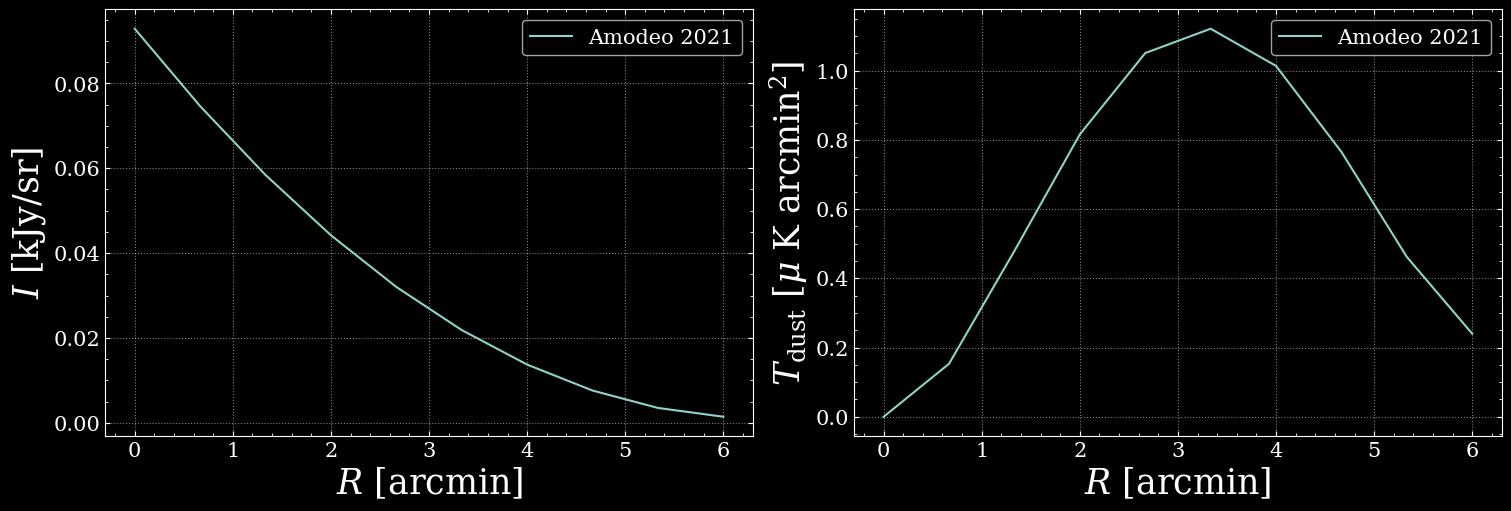

In [ ]:
import Models.Dust as Dust
importlib.reload(Dust)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

AmodeoDust = Dust.Amodeo2021({'model':'ACT+Hershel'})
AmodeoDust_poly = AmodeoDust.dustpoly(thetas, freq)()
axs[0].plot(thetas, AmodeoDust_poly, label='Amodeo 2021')
AmodeoDust_uK = AmodeoDust.dust_uK(thetas, freq)()
axs[1].plot(thetas, AmodeoDust_uK, label='Amodeo 2021')

axs[0].set(xlabel=r'$R$ [arcmin]', ylabel=r'$I$ [kJy/sr]'); axs[0].legend()
axs[1].set(xlabel=r'$R$ [arcmin]', ylabel=r'$T_\text{dust}$ [$\mu$ K arcmin$^2$]'); axs[1].legend()

plt.show()

# Stellar Mass Functions & Redshift Distributions

In [115]:
cpars = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76, "T_CMB":2.725}

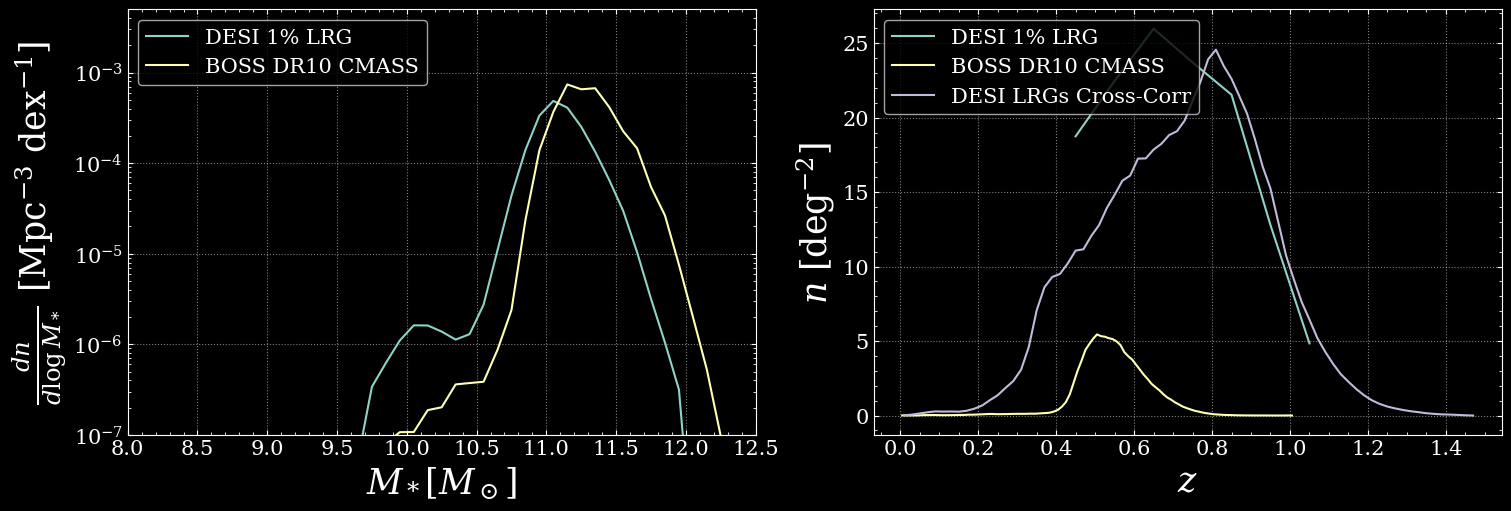

In [ ]:
import Models.SMFs as SMFs
importlib.reload(SMFs)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

desi1p = SMFs.DESI1Percent({'sample':'LRG'})
desi1p_smf = desi1p.dndlogmstar_avez(**cpars)
axs[0].plot(desi1p.logmstar, desi1p_smf, label=f'DESI 1% LRG')
desi1p_zdist = desi1p.N_z(**cpars)/desi1p.info['area']
axs[1].plot(desi1p.z, desi1p_zdist, label=f'DESI 1% LRG')

cmass = SMFs.BOSSDR10({'galaxy':'CMASS','group':'portsmouth', 'template':'passive', 'IMF':'Kroupa'})
cmass_smf = cmass.dndlogmstar_avez(**cpars)
axs[0].plot(cmass.logmstar, cmass_smf, label=f'BOSS DR10 CMASS')
cmass_zdist = cmass.N_z()/cmass.info['area']
axs[1].plot(cmass.z, cmass_zdist, label='BOSS DR10 CMASS')

desiXcorr = SMFs.DESILRGsCrossCorr({'pzbin':'all', 'hemisphere':'combined','sample':'main'})
desiXcorr_zdist = desiXcorr.N_z()/desiXcorr.info['area']
axs[1].plot(desiXcorr.z, desiXcorr_zdist, label=f'DESI LRGs Cross-Corr')

axs[0].set(xlabel=r'$M_* [M_\odot]$', ylabel=r'$\frac{dn}{d\log M_*}$ [Mpc$^{-3}$ dex$^{-1}$]', yscale='log', xlim=(8, 12.5), ylim=(1e-7, 5e-3)); axs[0].legend()
axs[1].set(xlabel=r'$z$', ylabel=r'$n$ [deg$^{-2}$]'); axs[1].legend()
plt.show()

# Measurements

In [24]:
def fnu(nu, T_cmb):
    x = (c.h * nu*u.GHz / (c.k_B * T_cmb*u.K)).decompose().value
    ans = x / np.tanh(x / 2.0) - 4.0
    return ans

cpars = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76, "T_CMB":2.725}
touK = lambda nu: fnu(nu, cpars['T_CMB'])*cpars['T_CMB']*1e6

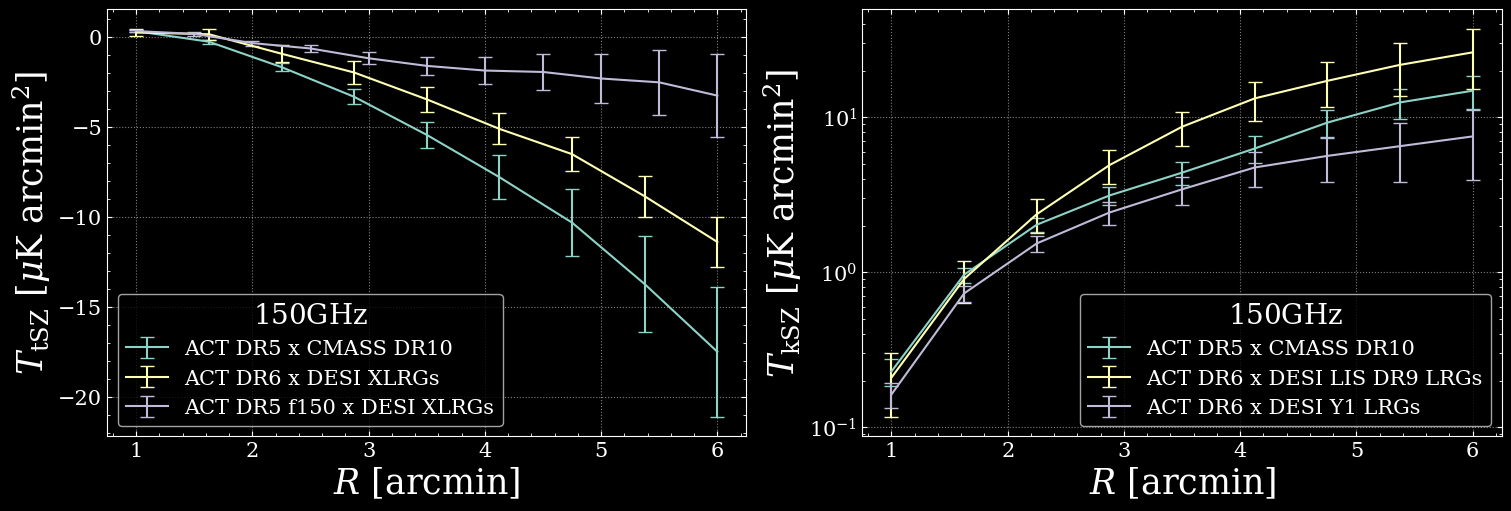

In [58]:
import Models.Data as Data
importlib.reload(Data)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

Schaan2021 = Data.Schaan2021({'freq': '150', 'sample':'cmass'})
axs[0].errorbar(Schaan2021.thetas, Schaan2021.tSZdata, np.diag(Schaan2021.tSZcov)**0.5, capsize=5, label='ACT DR5 x CMASS DR10')
axs[1].errorbar(Schaan2021.thetas, Schaan2021.kSZdata, np.diag(Schaan2021.kSZcov)**0.5, capsize=5, label='ACT DR5 x CMASS DR10')

Liu2025 = Data.Liu2025({'zbin':'1', 'dBeta':'1.2'})
axs[0].errorbar(Liu2025.thetas, Liu2025.tSZdata*touK(150), np.diag(Liu2025.tSZcov*touK(150)**2)**0.5, capsize=5, label='ACT DR6 x DESI XLRGs')
LiuDR5 = Liu2025.get_meas_ACTDR5(150)
axs[0].errorbar(LiuDR5[0], LiuDR5[1]*touK(150), -LiuDR5[2]*touK(150), capsize=5, label='ACT DR5 f150 x DESI XLRGs')

Hadzhiyska2025 = Data.Hadzhiyska2025({'zbin':'1', 'sample':'main', 'corr':'uncorrected', 'zoutcut':'nocut'})
axs[1].errorbar(Hadzhiyska2025.thetas, Hadzhiyska2025.kSZdata, np.diag(Hadzhiyska2025.kSZcov)**0.5, capsize=5, label='ACT DR6 x DESI LIS DR9 LRGs')

Guachalla2025 = Data.RiedGuachalla2025({'zbin':'all', 'mbin':'all'})
axs[1].errorbar(Guachalla2025.thetas, Guachalla2025.kSZdata, Guachalla2025.kSZerr, capsize=5, label='ACT DR6 x DESI Y1 LRGs')

axs[0].set(xlabel=r'$R$ [arcmin]', ylabel=r'$T_\text{tSZ}$ [$\mu$K arcmin$^2$]'); axs[0].legend(title=r'$150$GHz')
axs[1].set(xlabel=r'$R$ [arcmin]', ylabel=r'$T_\text{kSZ}$ [$\mu$K arcmin$^2$]', yscale='log'); axs[1].legend(title=r'$150$GHz', loc='lower right')
plt.show()